In [1]:
import spacy
nlp=spacy.load("en_core_web_md")
nlp=spacy.load("en")
nlp1=spacy.load('fr_core_news_md')
nlp1=spacy.load("fr")

In [2]:
import codecs
hotel=codecs.open("hotel.txt","r","utf-8")
hotel=hotel.read()
document=nlp(hotel)
type(document)

spacy.tokens.doc.Doc

## Tokenisation et lemmatisation

In [3]:
def token(doc):# type(doc)=class 'spacy.tokens.doc.Doc'
    Token=[]
    for token in doc:
        a=token.text
        Token.append(a)
    return Token
def lemma(doc):
    Lemma=[]
    for token in doc:
        a=token.lemma_
        Lemma.append(a)
    return Lemma

Comme les autres logiciels de NLP, Spacy est capable d'identifier les mots tout en les séparant, y compris les ponctuations et les autres caractères non-alphanumériques. Dans chaque modèle de langue, il y a des règles (dictionnaires) qui fonctionnent pour cette langue.

In [100]:
doc = nlp(u'Danny Drinkwater has scored for Chelsea.')
print(token(doc))
print(lemma(doc))

['Danny', 'Drinkwater', 'has', 'scored', 'for', 'Chelsea', '.']
['danny', 'drinkwater', 'have', 'score', 'for', 'chelsea', '.']


In [102]:
doc=nlp1(u"J'aime les cuisines chinoises.")
print(token(doc))
print(lemma(doc))# le verbe est important

["J'", 'aime', 'les', 'cuisines', 'chinoises', '.']
["J'", 'aimer', 'le', 'cuisiner', 'chinois', '.']


### If there's a match, the rule is applied and the tokenizer continues its loop, starting with the newly split substrings. This way, spaCy can split complex, nested tokens like combinations of abbreviations and multiple punctuation marks.

In [103]:
new_doc=nlp(u"He said: Let's go to N.Y.!")
token(new_doc)

['He', 'said', ':', 'Let', "'s", 'go', 'to', 'N.Y.', '!']

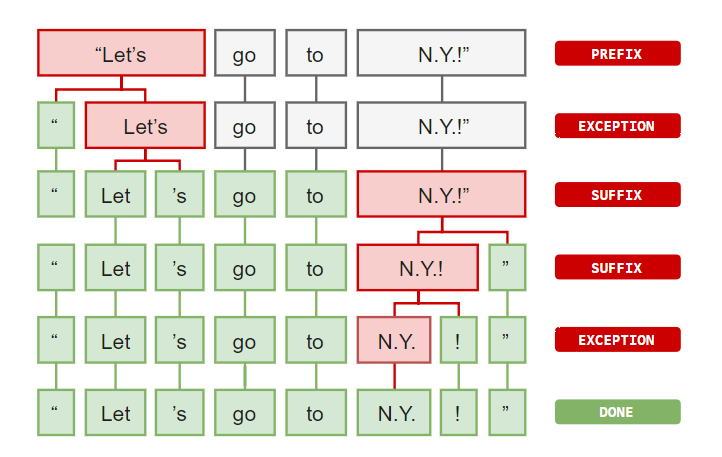

### Adding special case tokenization rules

### What does "U Gimme that" "Choccy biccy"mean?

In [104]:
from spacy.symbols import ORTH,LEMMA,POS,TAG
doc=nlp(u'u gimme that')
print(doc)
print(token(doc))
print(lemma(doc))

u gimme that
['u', 'gimme', 'that']
['u', 'gimme', 'that']


In [105]:
special_case = [{ORTH:u'gim',LEMMA:u'give',POS:u'Verb'},{ORTH:u'me',LEMMA:u'me',POS:u'Pron'}]
nlp.tokenizer.add_special_case(u'gimme',special_case)
special_case1 = [{ORTH:u'u',LEMMA:u'you',POS:u'Pronom'}]
nlp.tokenizer.add_special_case(u'u',special_case1)

In [107]:
print(token(nlp(u'u gimme that')))
print(lemma(nlp(u'u gimme that')))

['u', 'gim', 'me', 'that']
['you', 'give', 'me', 'that']


### POS-Tagger 

In [8]:
list(document.sents)[0]

Nice place Better than some reviews give it credit for.

In [108]:
def Spacy_Linguistique(doc):# doc est un class spacy span
    POS_Tag=[]
    for token in doc:
        #type(token) <class 'spacy.tokens.token.Token'>
        a=token.text # Text: The original word text.
        b=token.lemma_ # Lemma: The base form of the word.
        c=token.pos_ # POS: The simple part-of-speech tag.Adposition
        d=token.tag_# Tag: The detailed part-of-speech tag.
        e=token.dep_# Dep: Syntactic dependency, i.e. the relation between tokens.
        f=token.shape_# Shape: The word shape – capitalisation, punctuation, digits.
        g=token.is_alpha # is alpha: Is the token an alpha character?
        h=token.is_stop # is stop: Is the token part of a stop list, i.e. the most common words of the language? A list of words or other data items which, for some special reason, should be ignored or bypassed by a particular data processing operation.
                        # If you equip your search engine with a stop list containing a few common words such as "a", "the", and "and", you can decrease the full-text index size by about 20%.
        POS_Taggering = {"token":a,"lemma":b,"POS":c,"TAG":d,"DEP":e,"shape":f,"is Alpha or not":g,"Stop":h}
        POS_Tag.append(POS_Taggering)
    return POS_Tag,doc
print(Spacy_Linguistique(list(document.sents)[0]))

([{'token': 'Nice', 'lemma': 'nice', 'POS': 'ADJ', 'TAG': 'JJ', 'DEP': 'amod', 'shape': 'Xxxx', 'is Alpha or not': True, 'Stop': False}, {'token': 'place', 'lemma': 'place', 'POS': 'NOUN', 'TAG': 'NN', 'DEP': 'ROOT', 'shape': 'xxxx', 'is Alpha or not': True, 'Stop': False}, {'token': 'Better', 'lemma': 'good', 'POS': 'ADJ', 'TAG': 'JJR', 'DEP': 'amod', 'shape': 'Xxxxx', 'is Alpha or not': True, 'Stop': False}, {'token': 'than', 'lemma': 'than', 'POS': 'ADP', 'TAG': 'IN', 'DEP': 'mark', 'shape': 'xxxx', 'is Alpha or not': True, 'Stop': True}, {'token': 'some', 'lemma': 'some', 'POS': 'DET', 'TAG': 'DT', 'DEP': 'det', 'shape': 'xxxx', 'is Alpha or not': True, 'Stop': True}, {'token': 'reviews', 'lemma': 'review', 'POS': 'NOUN', 'TAG': 'NNS', 'DEP': 'nsubj', 'shape': 'xxxx', 'is Alpha or not': True, 'Stop': False}, {'token': 'give', 'lemma': 'give', 'POS': 'VERB', 'TAG': 'VBP', 'DEP': 'advcl', 'shape': 'xxxx', 'is Alpha or not': True, 'Stop': True}, {'token': 'it', 'lemma': '-PRON-', 'POS

In [10]:
print(spacy.explain('JJ'))
print(spacy.explain('NN'))
print(spacy.explain('JJR'))
print(spacy.explain('IN'))
print(spacy.explain('amod'))
print(spacy.explain('dobj'))
print(spacy.explain('pobj'))

adjective
noun, singular or mass
adjective, comparative
conjunction, subordinating or preposition
adjectival modifier
direct object
object of preposition


## Entité nommée

In [109]:
from spacy import displacy
doc=nlp(u'''The International Development Association (IDA) is an international financial institution which offers concessional loans and grants to the world's poorest developing countries. 
The IDA is a member of the World Bank Group and is headquartered in Washington, D.C., United States.
It was established in 1960 to complement the existing International Bank for Reconstruction and Development by lending to developing countries which suffer from the lowest gross national income, from troubled creditworthiness, or from the lowest per capita income. 
Together, the International Development Association and International Bank for Reconstruction and Development are collectively generally known as the World Bank, as they follow the same executive leadership and operate with the same staff.
The association shares the World Bank's mission of reducing poverty and aims to provide affordable development financing to countries whose credit risk is so prohibitive that they cannot afford to borrow commercially or from the Bank's other programs.
The IDA's stated aim is to assist the poorest nations in growing more quickly, equitably, and sustainably to reduce poverty.The IDA is the single largest provider of funds to economic and human development projects in the world's poorest nations. 
From 2000 to 2010, it financed projects which recruited and trained 3 million teachers, immunized 310 million children, funded $792 million in loans to 120,000 small and medium enterprises, built or restored 118,000 kilometers of paved roads, built or restored 1,600 bridges, and expanded access to improved water to 113 million people and improved sanitation facilities to 5.8 million people.
The IDA has issued a total $238 billion USD in loans and grants since its launch in 1960. 
Thirty-six of the association's borrowing countries have graduated from their eligibility for its concessional lending. However, eight of these countries have relapsed and have not re-graduated.''')
displacy.render(doc, style='ent', jupyter=True)

In [95]:
doc=nlp1(u'''Le Programme des Nations unies pour le développement (PNUD), fait partie des programmes et fonds de l'ONU. 
Son rôle est d'aider les pays en développement en leur fournissant des conseils mais également en plaidant leurs causes pour l'octroi de dons.
C'est ainsi que ce programme travaille en collaboration avec de nombreux autres programmes comme l'Onusida et d'autres organisations internationales (UPU et OMS notamment).
Son siège est situé à New York, aux États-Unis.
Les origines du PNUD remontent aux années 1950 avec la création par l’Assemblée générale des Nations unies du Programme élargi d’assistance technique (PEAT ou EPTA en anglais) et la mise en place en décembre 1958 du Fonds spécial des Nations unies (FSNU).
Les activités proches de ces deux organisations ont conduit l’Assemblée générale à décider de leur fusion par la résolution 2029 et la création au 1er janvier 1966 du PNUD.
Le 5 mai 2005, l'Assemblée générale des Nations unies a décidé à l'unanimité que l'Administrateur succédant à Mark Malloch-Brown (alors nommé Vice-secrétaire général des Nations unies par Kofi Annan) serait le Turc Kemal Dervis. 
Dervis était alors député à la Grande Assemblée nationale de Turquie et fut Ministre de l'Économie. 
Il est entré en fonction pour un mandat de 4 ans le 15 août 2005.''')
displacy.render(doc, style='ent', jupyter=True)

## Dependancy Parsing

«Dans la réalité on s'exprime par des phrases plus compliquées, où la fonction sujet et la fonction prédicat sont réalisées, non par un mot, mais un groupe de mots, un syntagme Ces syntagmes sont constitués d'un noyau, et des éléments dépendants, subordonnés [...]» 


Page 241 «Le Bon Usage», Maurice Grevisse et André Goosse, Editions De Boeck Université, 2008

In [110]:
def structure_of_one_sentence(doc):
    k=[]
    m=[]
    for chunk in doc.noun_chunks:
        k.append({chunk.text: (chunk.root.text, chunk.root.dep_,chunk.root.head.text)})
    for token in doc:
        m.append({token.text:(token.dep_, token.head.text, token.head.pos_,[child for child in token.children])})
    return k,m 

In [111]:
doc=nlp(u"Autonomous cars shift insurance liability toward manufacturers")
structure_of_one_sentence(doc)
# chunk.text: groupe nominal
# chunk.text: le noeud de ce group nominal
# chunk.root.dep_: Dependency relation connecting the root to its head. donner un lien interne pour l'analyse syntaxique
# chunk.root.head.text: The text of the root token's head.

([{'Autonomous cars': ('cars', 'nsubj', 'shift')},
  {'insurance liability': ('liability', 'dobj', 'shift')},
  {'manufacturers': ('manufacturers', 'pobj', 'toward')}],
 [{'Autonomous': ('amod', 'cars', 'NOUN', [])},
  {'cars': ('nsubj', 'shift', 'VERB', [Autonomous])},
  {'shift': ('ROOT', 'shift', 'VERB', [cars, liability, toward])},
  {'insurance': ('compound', 'liability', 'NOUN', [])},
  {'liability': ('dobj', 'shift', 'VERB', [insurance])},
  {'toward': ('prep', 'shift', 'VERB', [manufacturers])},
  {'manufacturers': ('pobj', 'toward', 'ADP', [])}])

# SV       -->  V           SN 
                    prédicat     dobj direct object

# SP       --> Prep       SP
                     prep        pobj object of préposition

In [15]:
print(spacy.explain('amod'))
print(spacy.explain('dobj'))
print(spacy.explain('pobj'))

adjectival modifier
direct object
object of preposition


## Visualization

In [112]:
doc = nlp1(u"La belle femme a fermé la porte")
print(structure_of_one_sentence(doc))
displacy.render(doc, style='dep', jupyter=True)

([{'La belle femme': ('femme', 'nsubj', 'fermé')}, {'la porte': ('porte', 'obj', 'fermé')}], [{'La': ('det', 'femme', 'NOUN', [])}, {'belle': ('amod', 'femme', 'NOUN', [])}, {'femme': ('nsubj', 'fermé', 'VERB', [La, belle])}, {'a': ('aux', 'fermé', 'VERB', [])}, {'fermé': ('ROOT', 'fermé', 'VERB', [femme, a, porte])}, {'la': ('det', 'porte', 'NOUN', [])}, {'porte': ('obj', 'fermé', 'VERB', [la])}])


In [113]:
doc = nlp(u"I hope that this presentation will be useful to your work")
print(structure_of_one_sentence(doc))
displacy.render(doc, style='dep', jupyter=True)

([{'I': ('I', 'nsubj', 'hope')}, {'this presentation': ('presentation', 'nsubj', 'be')}, {'your work': ('work', 'pobj', 'to')}], [{'I': ('nsubj', 'hope', 'VERB', [])}, {'hope': ('ROOT', 'hope', 'VERB', [I, be])}, {'that': ('mark', 'be', 'VERB', [])}, {'this': ('det', 'presentation', 'NOUN', [])}, {'presentation': ('nsubj', 'be', 'VERB', [this])}, {'will': ('aux', 'be', 'VERB', [])}, {'be': ('ccomp', 'hope', 'VERB', [that, presentation, will, useful])}, {'useful': ('acomp', 'be', 'VERB', [to])}, {'to': ('prep', 'useful', 'ADJ', [work])}, {'your': ('poss', 'work', 'NOUN', [])}, {'work': ('pobj', 'to', 'ADP', [your])}])


## Vecteurs pour les mots
L'algorithme de **Word-Embedding** permet à Spacy d'analyser le texte de manière sémantique.Brièvement,il s'agit de représenter un mot en espace vectoriel (un espace se composant de plusieurs vecteurs.) Comme numéro d'ID pour un mot, Spacy peut donc faire une comparaison et identifier la similarité de deux mots.

In [19]:
nlp2 = spacy.load("en_core_web_lg")

In [85]:
def similarite(a,b):
    a = nlp2.vocab[a]
    b = nlp2.vocab[b]
    indice = a.similarity(b)
    return indice

In [114]:
print(similarite("dog","cat"))

0.80168545


In [115]:
print(similarite("dog","apple"))

0.2633902


In [40]:
from scipy.spatial.distance import cosine

In [91]:
dog = nlp2.vocab["dog"]
cat = nlp2.vocab["cat"]
apple = nlp2.vocab["apple"]
orange = nlp2.vocab["orange"]

In [74]:
def vector_similarity(a,b):
    return 1-cosine(a,b)
vector_similarity(dog.vector,cat.vector)
vector_similarity(dog.vector,apple.vector)

0.2633902430534363

In [75]:
def make_guess_word(words):
    [first,second,third]=words
    return nlp2.vocab[first].vector - nlp2.vocab[second].vector + nlp2.vocab[third].vector

### A is to B what C is to D
 ___ is to England what Paris is to London.

In [93]:
def get_similar_word(words, scope=nlp2.vocab):

    guess_word = make_guess_word(words)

    similarities = []

    for word in scope:
        if not word.has_vector:
            continue

        similarity = vector_similarity(guess_word, word.vector)
        similarities.append((word, similarity))


    similarities = sorted(similarities, key=lambda item: -item[1])
    return [word[0].text for word in similarities[:10]]

In [92]:
words = ["Paris","London","England"]
get_similar_word(words)

['france',
 'FRANCE',
 'France',
 'Paris',
 'paris',
 'PARIS',
 'EUROPE',
 'EUrope',
 'europe',
 'Europe']